In [4]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
%matplotlib inline

In [6]:
data = pd.read_csv('./Indicators.csv')

In [7]:
countries = data["CountryName"].unique().tolist()
indicators = data["IndicatorName"].unique().tolist()
years = data["Year"].unique().tolist()

In [8]:
phys= [s for s  in indicators if "Physi" in s]
#only keep countries where Physicians(per 1000 people) data is available
maskPhysician = data["IndicatorName"]==phys[0]
#How many observations do we have?
maskPhysician.sum()
#How many countries reported data?
physicianDF=data[maskPhysician]
len(physicianDF["CountryName"].unique())
#whats the average value of Physicians per 1000 people
physicianDF["Value"].mean()

1.5858357056558288

In [9]:
#select 5 Countries for comparison
countryComparison= ("Austria","United States","Burkina Faso","China","Georgia")
maskFiveCOuntries = physicianDF["CountryName"].isin(countryComparison)
fiveCountriesPhysicianDF = physicianDF[maskFiveCOuntries]

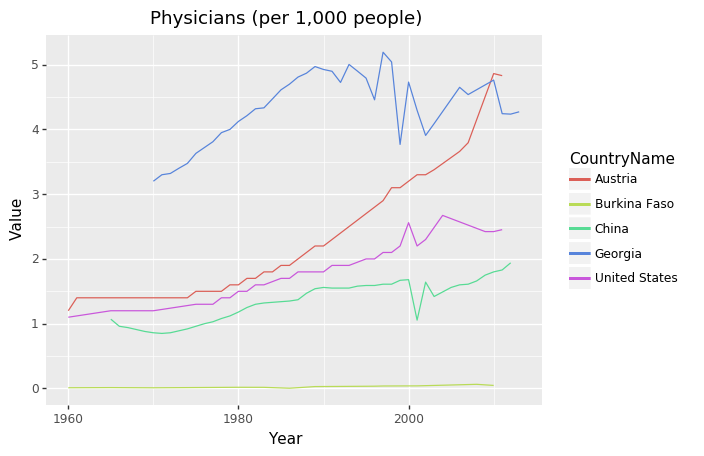

<ggplot: (-9223371935169535756)>

In [10]:
(ggplot(fiveCountriesPhysicianDF)         # defining what data to use
 + aes(x='Year',y="Value", colour="CountryName")    # defining what variable to use
 + geom_line() # defining the type of plot to use
 + ggtitle(phys[0])
)

In [11]:
#Look for interesting comparison indicators
indicators=[x.lower() for x in indicators]
healthMatch = ("life expectancy at birth, total (years)","survival rate to the last grade of primary education, both sexes (%)","fertility rate, total (births per woman)")
healthIndicators = [s for s in indicators if any(xs in s for xs in healthMatch)]
data["IndicatorName"]= [x.lower() for x in data["IndicatorName"]]
maskHealthIndicators = data["IndicatorName"].isin(healthMatch)
#How many Datapoints do we have?
maskHealthIndicators.sum()
maskFiveCOuntriesData = data["CountryName"].isin(countryComparison)
healthDF = data[maskHealthIndicators & maskFiveCOuntriesData]

In [12]:
#Splitt HealthDF in 3 Dataframes for different Indicators
FertilityDF = healthDF[healthDF["IndicatorName"]==healthIndicators[0]]
LifeExpectancyDF = healthDF[healthDF["IndicatorName"]==healthIndicators[1]]
SurvivalDF = healthDF[healthDF["IndicatorName"]==healthIndicators[2]]

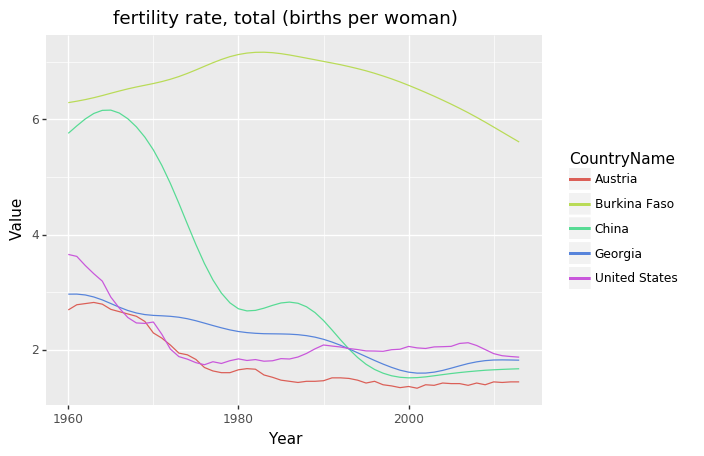

<ggplot: (-9223371935133173252)>

In [13]:
#Visualize fertility rate
(ggplot(FertilityDF)         # defining what data to use
 + aes(x='Year',y="Value", colour="CountryName")    # defining what variable to use
 + geom_line() # defining the type of plot to use
 + ggtitle(healthIndicators[0])
)

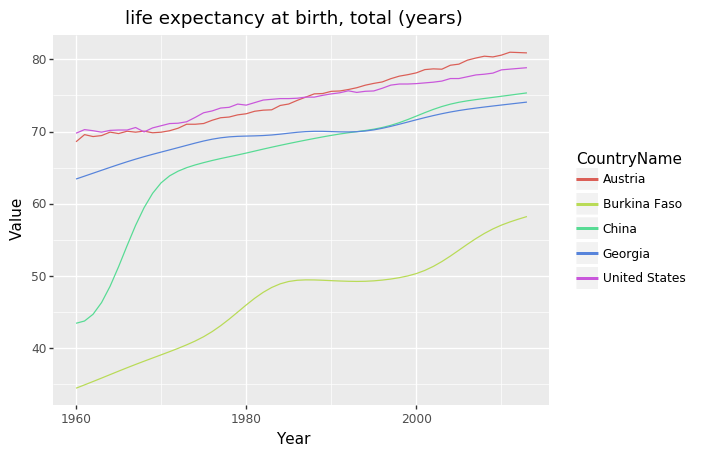

<ggplot: (-9223371935176205652)>

In [16]:
#Visualize Life Expectancy
(ggplot(LifeExpectancyDF)         # defining what data to use
 + aes(x='Year',y="Value", colour="CountryName")    # defining what variable to use
 + geom_line() # defining the type of plot to use
 + ggtitle(healthIndicators[1])
)

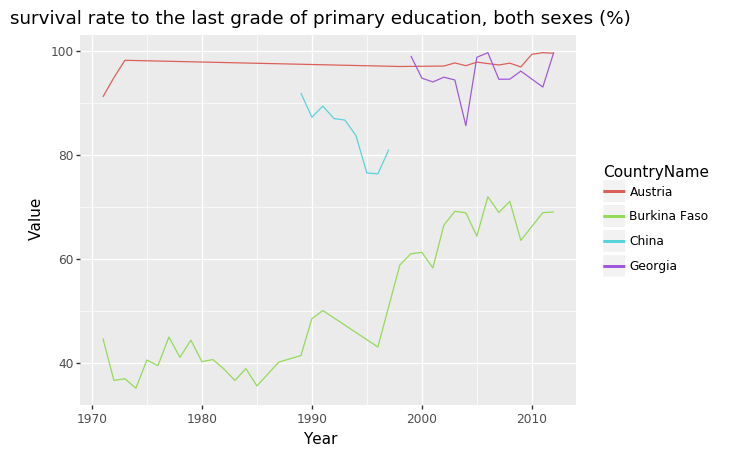

<ggplot: (-9223371935181839372)>

In [15]:
#Visualize Survival rate
(ggplot(SurvivalDF)         # defining what data to use
 + aes(x='Year',y="Value", colour="CountryName")    # defining what variable to use
 + geom_line() # defining the type of plot to use
 + ggtitle(healthIndicators[2])
)

In [17]:
#Is there a correlation between Number of Physicians and SurvivalRate?
mergedSurvival = pd.merge(SurvivalDF,fiveCountriesPhysicianDF,on=["CountryName","Year"])
mergedSurvival["Value_x"].corr(mergedSurvival["Value_y"])

0.7934505357762084

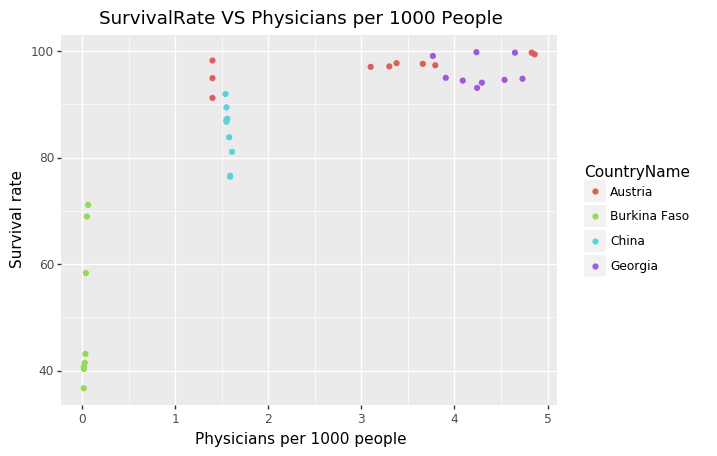

<ggplot: (-9223371935180189140)>

In [18]:
#Visualize the correlation
(ggplot(mergedSurvival)         # defining what data to use
 + aes(x='Value_y',y="Value_x", colour="CountryName")    # defining what variable to use
 + geom_point() # defining the type of plot to use
 + ggtitle("SurvivalRate VS Physicians per 1000 People")
 + labs(x = "Physicians per 1000 people", y = "Survival rate")
)